In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading dataset

In [2]:
X_train = np.loadtxt('input.csv',delimiter=',')

In [3]:
Y_train = np.loadtxt('labels.csv',delimiter=',')

In [4]:
X_test = np.loadtxt('input_test.csv',delimiter=',')

In [5]:
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [7]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [8]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [9]:
X_train = X_train/255.0

In [10]:
X_test = X_test/255.0

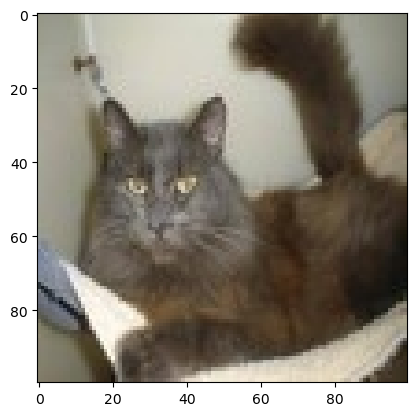

In [11]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

Model

In [12]:
model = Sequential([
    
    Conv2D( 32,(3,3) , activation='relu' ,input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [13]:
model = Sequential()
 
model.add(Conv2D( 32,(3,3) , activation='relu' ,input_shape = (100,100,3)))
model.add( MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [15]:
model.fit(X_train,Y_train,epochs=5,batch_size = 64)

Epoch 1/5
32/32 [==============================] - 8s 241ms/step - loss: 1.2115 - accuracy: 0.4905
Epoch 2/5
32/32 [==============================] - 7s 230ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 8s 242ms/step - loss: 0.6931 - accuracy: 0.5005
Epoch 4/5
32/32 [==============================] - 8s 262ms/step - loss: 0.6931 - accuracy: 0.5005
Epoch 5/5
32/32 [==============================] - 8s 253ms/step - loss: 0.6933 - accuracy: 0.4965


In [16]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 29ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693156361579895, 0.5]

 Making Predictions

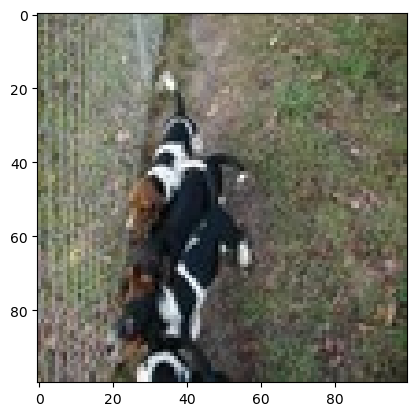

1/1 [==============================] - 0s 128ms/step
[[0.50214434]]
our model prediction : cat


In [17]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)
y_pred = y_pred > 0.5 
if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print('our model prediction :',pred)